In [6]:
# IMPORT AND DISPLAY SETTINGS

# !pip install pandas
# !pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas as pd
import numpy as np
import re

# pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format




In [7]:
# LOAD DATASET

user_data = pd.read_csv(r"raw-data\Dataset.csv")
# print(user_data.columns)
print(user_data.shape)

(121856, 40)


C:\Users\Pankaj\AppData\Local\Temp\ipykernel_19920\3740303952.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv(r"raw-data\Dataset.csv")


In [8]:
user_data.drop(columns='ID')

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.00,2.00,6.00,17.00,Yes,Yes,Self-employed,0.57,0.48,NaN,0.02,63.00,NaN,0
1,20250,1.00,0.00,1.00,NaN,0.00,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.00,1,0,1,NaN,2.00,2.00,3.00,10.00,Yes,Yes,Government,0.56,0.22,NaN,NaN,NaN,NaN,0
2,18000,0.00,0.00,1.00,0.00,1.00,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.00,2.00,4.00,NaN,Yes,Yes,Self-employed,NaN,0.55,0.33,0.07,277.00,0.00,0
3,15750,0.00,0.00,1.00,1.00,0.00,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.00,3.00,2.00,15.00,Yes,Yes,XNA,NaN,0.14,0.63,NaN,1700.00,3.00,0
4,33750,1.00,0.00,1.00,0.00,2.00,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.00,1,0,0,Laborers,4.00,1.00,3.00,NaN,Yes,Yes,Business Entity Type 3,0.51,0.30,0.36,0.20,674.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,29250,0.00,0.00,NaN,1.00,0.00,107820,3165.30,Relative,Service,Secondary,M,Female,CL,Home,0.03,12889.00,2863.00,2661.00,2943.00,NaN,1,0,0,Laborers,2.00,2.00,4.00,16.00,Yes,No,Business Entity Type 2,NaN,0.17,0.18,0.06,0.00,1.00,1
121852,15750,0.00,1.00,1.00,0.00,0.00,104256,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.02,8648.00,636.00,902.00,1209.00,NaN,1,1,0,Sales,2.00,3.00,4.00,12.00,Yes,Yes,Self-employed,NaN,0.37,0.41,0.08,4.00,0.00,0
121853,8100,0.00,1.00,0.00,1.00,1.00,55107.9,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.01,9152.00,1623.00,3980.00,353.00,NaN,1,0,0,High skill tech,3.00,3.00,5.00,11.00,No,No,Trade: type 6,0.17,0.05,NaN,NaN,0.00,NaN,0
121854,38250,1.00,1.00,0.00,1.00,0.00,45000,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.03,10290.00,847.00,895.00,2902.00,4.00,1,0,0,Sales,2.00,2.00,1.00,12.00,Yes,Yes,Business Entity Type 3,0.18,0.10,0.08,0.10,0.00,2.00,0


In [11]:
# user_data.astype('object').columns

# some of these columns are numeric but marked with dtype object

In [12]:
user_data.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [13]:

def clean_and_convert_numeric_columns(df, threshold=0.9, verbose=True):
    """
    Detects object columns that are actually numeric, cleans them,
    and converts to numeric type if enough values are valid.

    Parameters:
        df (pd.DataFrame): Your input DataFrame
        threshold (float): Minimum % of convertible values to treat column as numeric
        verbose (bool): If True, prints which columns are converted

    Returns:
        df (pd.DataFrame): Updated DataFrame with converted columns
        converted_cols (list): List of converted column names
    """
    object_cols = df.select_dtypes(include='object').columns
    converted_cols = []

    for col in object_cols:
        original = df[col]

        # Step 1: Clean common symbols
        # print(col)
        # print(original.notna().mean())

        cleaned = (
            original.astype(str)
            .str.replace(r'[$₹,%]', '', regex=True)
            .str.replace(',', '')
            .str.strip()
        )

        # Step 2: Try converting to numeric
        converted = pd.to_numeric(cleaned, errors='coerce')

        # Step 3: Check conversion ratio (ignores existing NaNs too)
        valid_ratio = converted.notna().mean()

        if valid_ratio >= threshold:
            df[col] = converted
            converted_cols.append(col)
            if verbose:
                print(f"✅ Converted: {col} (Valid Ratio: {valid_ratio:.2f})")
        else:
            if verbose:
                print(f"❌ Skipped : {col} (Valid Ratio: {valid_ratio:.2f})")

    return df, converted_cols

In [14]:
user_data, converted_cols = clean_and_convert_numeric_columns(user_data, threshold=0.9, verbose=True)
converted_cols

✅ Converted: Client_Income (Valid Ratio: 0.97)
✅ Converted: Credit_Amount (Valid Ratio: 0.97)
✅ Converted: Loan_Annuity (Valid Ratio: 0.96)
❌ Skipped : Accompany_Client (Valid Ratio: 0.00)
❌ Skipped : Client_Income_Type (Valid Ratio: 0.00)
❌ Skipped : Client_Education (Valid Ratio: 0.00)
❌ Skipped : Client_Marital_Status (Valid Ratio: 0.00)
❌ Skipped : Client_Gender (Valid Ratio: 0.00)
❌ Skipped : Loan_Contract_Type (Valid Ratio: 0.00)
❌ Skipped : Client_Housing_Type (Valid Ratio: 0.00)
✅ Converted: Population_Region_Relative (Valid Ratio: 0.96)
✅ Converted: Age_Days (Valid Ratio: 0.97)
✅ Converted: Employed_Days (Valid Ratio: 0.97)
✅ Converted: Registration_Days (Valid Ratio: 0.97)
✅ Converted: ID_Days (Valid Ratio: 0.95)
❌ Skipped : Client_Occupation (Valid Ratio: 0.00)
❌ Skipped : Client_Permanent_Match_Tag (Valid Ratio: 0.00)
❌ Skipped : Client_Contact_Work_Tag (Valid Ratio: 0.00)
❌ Skipped : Type_Organization (Valid Ratio: 0.00)
❌ Skipped : Score_Source_3 (Valid Ratio: 0.78)


['Client_Income',
 'Credit_Amount',
 'Loan_Annuity',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days']

In [15]:
# Score_Source_3 has too many null values already, cant cross threshold. Need to convert seperately
user_data['Score_Source_3'] = user_data['Score_Source_3'].astype(str).str.replace(r'[$₹,%]', '', regex=True).str.replace(',', '').str.strip()
user_data['Score_Source_3'] = pd.to_numeric(user_data['Score_Source_3'], errors='coerce')

In [16]:
# Now we have two kind of columns - categorical with object dtype and numerical with dtype as float/int
user_data.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [17]:
user_data.select_dtypes('object').head()


,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
0,Alone,Commercial,Secondary,M,Male,CL,Home,Sales,Yes,Yes,Self-employed
1,Alone,Service,Graduation,M,Male,CL,Home,NaN,Yes,Yes,Government
2,Alone,Service,Graduation dropout,W,Male,CL,Family,Realty agents,Yes,Yes,Self-employed
3,Alone,Retired,Secondary,M,Male,CL,Home,NaN,Yes,Yes,XNA
4,Alone,Commercial,Secondary,M,Female,CL,Home,Laborers,Yes,Yes,Business Entity Type 3


In [18]:
user_data.select_dtypes(['float64','int64']).head()


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,0.03,13957.00,1062.00,6123.00,383.00,NaN,1,1,0,2.00,2.00,6.00,17.00,0.57,0.48,NaN,0.02,63.00,NaN,0
1,12138936,20250.00,1.00,0.00,1.00,NaN,0.00,15282.00,1826.55,0.01,14162.00,4129.00,7833.00,21.00,0.00,1,0,1,2.00,2.00,3.00,10.00,0.56,0.22,NaN,NaN,NaN,NaN,0
2,12181264,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,0.02,16790.00,5102.00,NaN,331.00,NaN,1,0,0,2.00,2.00,4.00,NaN,NaN,0.55,0.33,0.07,277.00,0.00,0
3,12188929,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,0.01,23195.00,365243.00,NaN,775.00,NaN,1,0,0,2.00,3.00,2.00,15.00,NaN,0.14,0.63,NaN,1700.00,3.00,0
4,12133385,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,0.02,11366.00,2977.00,5516.00,4043.00,6.00,1,0,0,4.00,1.00,3.00,NaN,0.51,0.30,0.36,0.20,674.00,1.00,0


In [19]:
# data-types fixed
# Check data distribution now
user_data.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,121856.00,118234.00,118275.00,118232.00,118221.00,118195.00,118218.00,118219.00,117030.00,116988.00,118239.00,118190.00,118225.00,115871.00,41761.00,121856.00,121856.00,121856.00,119446.00,119447.00,119428.00,118193.00,53021.00,116170.00,94934.00,59928.00,118192.00,103316.00,121856.00
mean,12160928.50,16865.19,0.34,0.33,0.50,0.69,0.42,60046.49,2721.25,0.02,16027.42,67154.07,4975.16,2987.47,12.16,1.00,0.20,0.28,2.15,2.03,3.16,12.06,0.50,0.52,0.51,0.12,962.11,1.89,0.08
std,35176.94,11538.15,0.47,0.47,0.50,0.46,0.73,40350.66,1461.47,0.41,4366.36,138971.78,3514.55,1511.88,12.06,0.00,0.40,0.45,0.91,0.50,1.76,3.28,0.21,0.74,0.19,0.11,827.98,1.86,0.27
min,12100001.00,2565.00,0.00,0.00,0.00,0.00,0.00,4500.00,217.35,0.00,7676.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
25%,12130464.75,11250.00,0.00,0.00,0.00,0.00,0.00,27000.00,1657.35,0.01,12398.00,932.00,2008.00,1705.00,5.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.33,0.39,0.37,0.06,272.00,0.00,0.00
50%,12160928.50,14400.00,0.00,0.00,0.00,1.00,0.00,51750.00,2499.75,0.02,15734.00,2212.00,4493.00,3242.00,9.00,1.00,0.00,0.00,2.00,2.00,3.00,12.00,0.50,0.56,0.54,0.09,755.00,1.00,0.00
75%,12191392.25,20250.00,1.00,1.00,1.00,1.00,1.00,80865.00,3466.80,0.03,19661.00,5634.00,7464.00,4295.00,15.00,1.00,0.00,1.00,3.00,2.00,5.00,14.00,0.67,0.66,0.67,0.15,1570.00,3.00,0.00
max,12221856.00,1800009.00,1.00,1.00,1.00,1.00,19.00,405000.00,22500.00,100.00,25201.00,365243.00,23738.00,7197.00,69.00,1.00,1.00,1.00,16.00,3.00,6.00,23.00,0.95,100.00,0.90,1.00,4185.00,22.00,1.00


In [20]:
# Initial observation - too many outliers and missing values

In [21]:
# REMOVE OUTLIRES
def clip_outliers(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_col.clip(lower=lower_bound, upper=upper_bound)

def impute_missing_values(df_col, data_type):
    
    if data_type == 'Numeric':
        return df_col.fillna(df_col.median())
    elif data_type == 'Categorical':
        return df_col.fillna(df_col.mode()[0])
    else:
        return df_col  


# since we are using median for impute, imputation can be done before clipping. But not neccesory for all cases.

def clean_dataframe(df, drop_threshold=0.1):
    for col in df.columns:
        missing_pct = df[col].isna().mean()
        
        # Drop if missing % is too high
        if missing_pct > drop_threshold:
            print(f"Flagged {col} - missing {missing_pct*100:.2f}%")
            # df.drop(columns=[col], inplace=True)
            continue

        if df[col].dtype in ['float64', 'int64'] and col != 'Default':
            print(col, missing_pct)
            df[col] = impute_missing_values(df[col], 'Numeric')
            df[col] = clip_outliers(df[col])

        elif df[col].dtype == 'object':
            df[col] = impute_missing_values(df[col], 'Categorical')
            
    return df





In [22]:
user_data = clean_dataframe(user_data) 
print(pd.DataFrame(user_data))

ID 0.0
Client_Income 0.02972360819327731
Car_Owned 0.029387145483193277
Bike_Owned 0.02974002100840336
Active_Loan 0.02983029149159664
House_Own 0.030043658088235295
Child_Count 0.029854910714285716
Credit_Amount 0.02984670430672269
Loan_Annuity 0.03960412289915966
Population_Region_Relative 0.03994879201680672
Age_Days 0.029682576155462184
Employed_Days 0.03008469012605042
Registration_Days 0.02979746586134454
ID_Days 0.049115349264705885
Flagged Own_House_Age - missing 65.73%
Mobile_Tag 0.0
Homephone_Tag 0.0
Workphone_Working 0.0
Flagged Client_Occupation - missing 34.00%
Client_Family_Members 0.019777442226890755
Cleint_City_Rating 0.01976923581932773
Application_Process_Day 0.01992515756302521
Application_Process_Hour 0.030060070903361345
Flagged Score_Source_1 - missing 56.49%
Score_Source_2 0.046661633403361345
Flagged Score_Source_3 - missing 22.09%
Flagged Social_Circle_Default - missing 50.82%
Phone_Change 0.03006827731092437
Flagged Credit_Bureau - missing 15.21%
            

In [23]:
#  Low Missing (Safe to Impute)
# Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count, Credit_Amount, Loan_Annuity, Population_Region_Relative, Age_Days, Employed_Days, Registration_Days, ID_Days, Client_Family_Members, Cleint_City_Rating, Application_Process_Day, Application_Process_Hour, Phone_Change, Score_Source_2

# All of these are <10% missing – our current method is fine.

  

# ⚠️ High Missing (Needs Special Attention)
# Own_House_Age: 65.7% missing → Consider dropping unless it's critical.

# Client_Occupation - missing 34.00% -  Impute only if relevant.

# Score_Source_1: 56.4% missing → Consider dropping or imputing via ML model if important.

# Score_Source_3: 22% missing → Impute only if relevant.

# Social_Circle_Default: 50.8% missing → Consider dropping.

# Credit_Bureau: 15.2% missing → Safe to impute if important.



# look how they behave with output label before imputing
# Score_Source_3: 22%
# Credit_Bureau: 15.2%
# Client_Occupation: 34.00%


            

# rest all have huge missing count can be dropped for now, later if required can be analyzed.
# Own_House_Age
# Score_Source_1
# Social_Circle_Default


In [24]:
# 1.  Score_Source_3: 22%

user_data['Score_Source_3'].sample(5)

87025   0.29
86383   0.70
79541   0.79
92267    NaN
10103   0.14
Name: Score_Source_3, dtype: float64

<Axes: xlabel='Score_Source_3', ylabel='Default'>

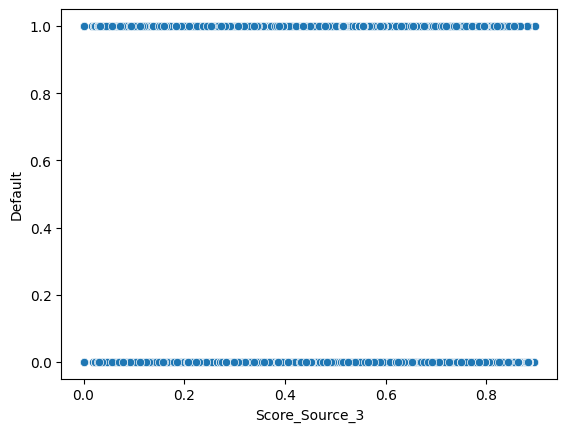

In [25]:
sns.scatterplot(data=user_data, x='Score_Source_3', y='Default')

         count  mean  median  min  max  std
Default                                    
0        87475  0.52    0.55 0.00 0.89 0.19
1         7459  0.39    0.39 0.00 0.90 0.21


<Axes: xlabel='Default', ylabel='Score_Source_3'>

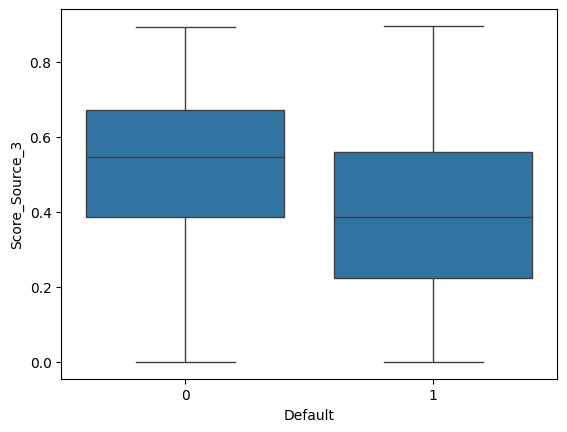

In [26]:
print(user_data.groupby('Default')['Score_Source_3'].agg(['count', 'mean', 'median', 'min', 'max', 'std']))
sns.boxplot(data=user_data, x='Default', y='Score_Source_3')


<Axes: xlabel='Credit_Bureau', ylabel='Count'>

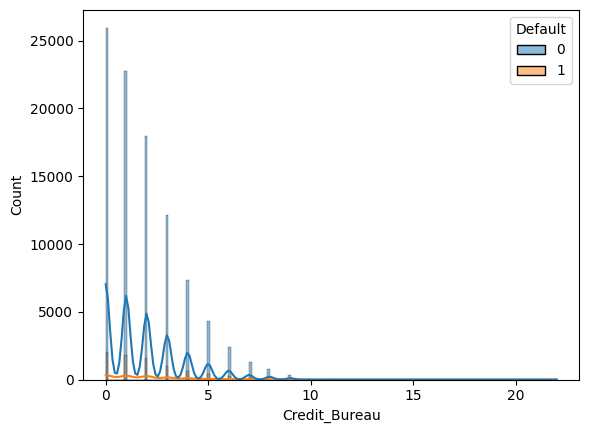

In [27]:
user_data.groupby('Default')['Credit_Bureau'].agg(['count', 'mean', 'median'])
sns.histplot(data=user_data, x='Credit_Bureau', hue='Default', kde=True)


In [28]:
print(user_data.groupby('Default')['Credit_Bureau'].agg(['count', 'mean', 'median', 'min', 'max', 'std']))
# sns.boxplot(data=user_data, x='Default', y='Credit_Bureau')

         count  mean  median  min   max  std
Default                                     
0        95296  1.88    1.00 0.00 21.00 1.85
1         8020  2.02    2.00 0.00 22.00 1.96


In [29]:
# People who defaulted (1) have a slightly higher average number of credit bureau inquiries.

# Median for defaulters is 2 vs 1 for non-defaulters — this is directionally useful.
    
    # # Simple median imputation
# user_data['Credit_Bureau'] = duser_dataf['Credit_Bureau'].fillna(user_data['Credit_Bureau'].median())

# # Or stratified (slightly better)
# user_data['Credit_Bureau'] = user_data.groupby('Default')['Credit_Bureau'].transform(lambda x: x.fillna(x.median()))

user_data['Credit_Bureau'] = user_data.groupby('Default')['Credit_Bureau'].transform(lambda x: x.fillna(x.median()))
user_data['Score_Source_3'] = user_data.groupby('Default')['Score_Source_3'].transform(lambda x: x.fillna(x.median()))


In [30]:
user_data['Client_Occupation'].value_counts()

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64

Client_Occupation
NaN                   41435
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


<Axes: xlabel='Client_Occupation'>

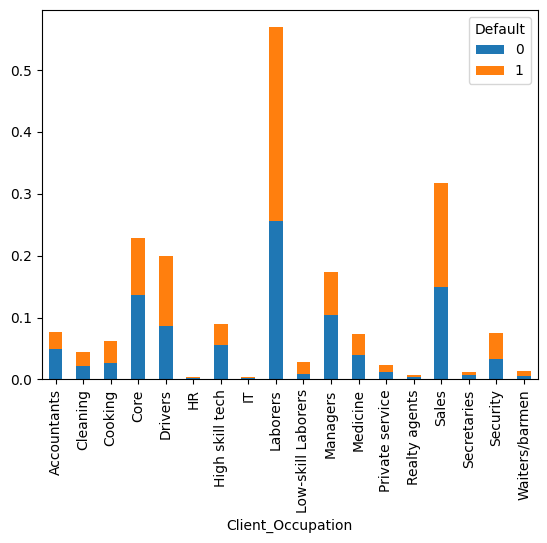

In [31]:
print(user_data['Client_Occupation'].value_counts(dropna=False))
user_data.groupby('Default')['Client_Occupation'].value_counts(normalize=True).unstack().T.plot(kind='bar', stacked=True)



In [32]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)  # Row-wise percentage

Default,0,1
Client_Occupation,,
HR,0.95,0.05
Accountants,0.95,0.05
High skill tech,0.94,0.06
Managers,0.94,0.06
Core,0.94,0.06
Secretaries,0.93,0.07
Private service,0.93,0.07
Medicine,0.93,0.07
Realty agents,0.93,0.07


In [33]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)[1].mean()

np.float64(0.08654657523535168)

In [34]:
pd.crosstab(user_data['Client_Occupation'], user_data['Default'], normalize='index').sort_values(by=1)[1].median()

np.float64(0.07831632653061224)

In [35]:
data_with_nan_occupation = user_data[user_data['Client_Occupation'].isna()]
data_with_nan_occupation['Default'].value_counts(normalize=True)

Default
0   0.93
1   0.07
Name: proportion, dtype: float64

In [36]:
# Missing Client_Occupation has a slightly higher default rate than the overall average.

# So, missingness is not completely random — it carries a bit of signal.

user_data['Client_Occupation'] = user_data['Client_Occupation'].fillna('Missing')

In [37]:
user_data.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.03,13957.00,1062.00,6123.00,383.00,NaN,1,0,0,Sales,2.00,2.00,6.00,17.00,Yes,Yes,Self-employed,0.57,0.48,0.55,0.02,63.00,1.00,0
1,12138936,20250.00,1.00,0.00,1.00,1.00,0.00,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.01,14162.00,4129.00,7833.00,21.00,0.00,1,0,1,Missing,2.00,2.00,3.00,10.00,Yes,Yes,Government,0.56,0.22,0.55,NaN,755.00,1.00,0
2,12181264,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.02,16790.00,5102.00,4493.00,331.00,NaN,1,0,0,Realty agents,2.00,2.00,4.00,12.00,Yes,Yes,Self-employed,NaN,0.55,0.33,0.07,277.00,0.00,0
3,12188929,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.01,23195.00,12019.50,4493.00,775.00,NaN,1,0,0,Missing,2.00,2.00,2.00,15.00,Yes,Yes,XNA,NaN,0.14,0.63,NaN,1700.00,3.00,0
4,12133385,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.02,11366.00,2977.00,5516.00,4043.00,6.00,1,0,0,Laborers,4.00,2.00,3.00,12.00,Yes,Yes,Business Entity Type 3,0.51,0.30,0.36,0.20,674.00,1.00,0


In [38]:
user_data.describe()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,41761.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,121856.00,53021.00,121856.00,121856.00,59928.00,121856.00,121856.00,121856.00
mean,12160928.50,16205.61,0.33,0.32,0.48,0.70,0.40,59125.55,2676.79,0.02,16018.71,4036.79,4957.26,2999.97,12.16,1.00,0.00,0.28,2.14,2.00,3.16,12.07,0.50,0.52,0.52,0.12,955.46,1.77,0.08
std,35176.94,7233.59,0.47,0.47,0.50,0.46,0.68,37532.09,1293.91,0.01,4301.35,4184.72,3450.88,1475.31,12.06,0.00,0.00,0.45,0.87,0.00,1.74,3.20,0.21,0.19,0.17,0.11,814.85,1.74,0.27
min,12100001.00,2565.00,0.00,0.00,0.00,0.00,0.00,4500.00,217.35,0.00,7676.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00,4.00,0.01,0.02,0.00,0.00,0.00,0.00,0.00
25%,12130464.75,11250.00,0.00,0.00,0.00,0.00,0.00,27450.00,1687.50,0.01,12512.00,962.00,2102.00,1789.00,5.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.33,0.40,0.40,0.06,287.00,1.00,0.00
50%,12160928.50,14400.00,0.00,0.00,0.00,1.00,0.00,51750.00,2499.75,0.02,15734.00,2212.00,4493.00,3242.00,9.00,1.00,0.00,0.00,2.00,2.00,3.00,12.00,0.50,0.56,0.55,0.09,755.00,1.00,0.00
75%,12191392.25,20250.00,1.00,1.00,1.00,1.00,1.00,80865.00,3407.96,0.03,19544.00,5385.00,7350.00,4263.00,15.00,1.00,0.00,1.00,3.00,2.00,5.00,14.00,0.67,0.66,0.63,0.15,1550.00,3.00,0.00
max,12221856.00,33750.00,1.00,1.00,1.00,1.00,2.50,160987.50,5988.66,0.05,25201.00,12019.50,15222.00,7197.00,69.00,1.00,0.00,1.00,4.50,2.00,6.00,20.00,0.95,1.05,0.90,1.00,3444.50,22.00,1.00


In [39]:
user_data.drop(columns=['Own_House_Age', 'Score_Source_1', 'Social_Circle_Default'],inplace=True)

In [40]:
user_data.isna().sum().reset_index()

,index,0
0,ID,0
1,Client_Income,0
2,Car_Owned,0
3,Bike_Owned,0
4,Active_Loan,0
5,House_Own,0
6,Child_Count,0
7,Credit_Amount,0
8,Loan_Annuity,0
9,Accompany_Client,0


In [41]:
# NO MORE MISSING VALUES
# FIX OULIERS OF NEWLY IMPUTED VALUES
user_data['Score_Source_3'] = clip_outliers(user_data['Score_Source_3'])
user_data['Credit_Bureau'] = clip_outliers(user_data['Credit_Bureau'])


In [42]:
# # Own_House_Age: 65.7% missing → Consider dropping unless it's critical.
# sns.scatterplot(data=user_data, x='Own_House_Age', y='Default')

In [43]:
# user_data.groupby('Default')['Own_House_Age'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

# # No point in keeping this feature

In [44]:
# # Score_Source_1: 56.4% missing → Consider dropping or imputing via ML model if important.
# sns.scatterplot(data=user_data, x='Score_Source_1',y='Default')
# user_data.groupby('Default')['Score_Source_1'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])

In [45]:
# Defaulters have lower scores: Mean drops from 0.51 → 0.39, which is quite significant.

# Median also shifts from 0.52 → 0.37, reinforcing this.

# Might help after imputation

# Option A: Add Missing Indicator

# user_data['Score_Source_1_Missing'] = user_data['Score_Source_1'].isna().astype(int)
# → Helps model leverage the fact that missingness might be informative.

# Option B: Impute with Class-wise Median

# user_data['Score_Source_1'] = user_data.groupby('Default')['Score_Source_1'].transform(
#     lambda x: x.fillna(x.median())
# )
# → Safer than global median, maintains the class-based signal.

In [46]:
# user_data['Score_Source_1'] = user_data.groupby('Default')['Score_Source_1'].transform(
#     lambda x: x.fillna(x.median())
# )

# # remove outliers then impute mssing values if missing % less than 10%
# # if missing pct > 10% investigate columns and their behaviour with output label and impute accordingly.

In [47]:
# Own_House_Age
# Score_Source_1
# Social_Circle_Default

In [48]:
user_data

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
0,12142509,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.03,13957.00,1062.00,6123.00,383.00,1,0,0,Sales,2.00,2.00,6.00,17.00,Yes,Yes,Self-employed,0.48,0.55,63.00,1.00,0
1,12138936,20250.00,1.00,0.00,1.00,1.00,0.00,15282.00,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.01,14162.00,4129.00,7833.00,21.00,1,0,1,Missing,2.00,2.00,3.00,10.00,Yes,Yes,Government,0.22,0.55,755.00,1.00,0
2,12181264,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,Alone,Service,Graduation dropout,W,Male,CL,Family,0.02,16790.00,5102.00,4493.00,331.00,1,0,0,Realty agents,2.00,2.00,4.00,12.00,Yes,Yes,Self-employed,0.55,0.33,277.00,0.00,0
3,12188929,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.01,23195.00,12019.50,4493.00,775.00,1,0,0,Missing,2.00,2.00,2.00,15.00,Yes,Yes,XNA,0.14,0.63,1700.00,3.00,0
4,12133385,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.02,11366.00,2977.00,5516.00,4043.00,1,0,0,Laborers,4.00,2.00,3.00,12.00,Yes,Yes,Business Entity Type 3,0.30,0.36,674.00,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.00,0.00,0.00,0.00,1.00,0.00,107820.00,3165.30,Relative,Service,Secondary,M,Female,CL,Home,0.03,12889.00,2863.00,2661.00,2943.00,1,0,0,Laborers,2.00,2.00,4.00,16.00,Yes,No,Business Entity Type 2,0.17,0.18,0.00,1.00,1
121852,12173765,15750.00,0.00,1.00,1.00,0.00,0.00,104256.00,3388.05,Alone,Commercial,Graduation,M,Female,CL,Home,0.02,8648.00,636.00,902.00,1209.00,1,0,0,Sales,2.00,2.00,4.00,12.00,Yes,Yes,Self-employed,0.37,0.41,4.00,0.00,0
121853,12103937,8100.00,0.00,1.00,0.00,1.00,1.00,55107.90,2989.35,Alone,Govt Job,Secondary,M,Male,CL,Home,0.01,9152.00,1623.00,3980.00,353.00,1,0,0,High skill tech,3.00,2.00,5.00,11.00,No,No,Trade: type 6,0.05,0.55,0.00,1.00,0
121854,12170623,33750.00,1.00,1.00,0.00,1.00,0.00,45000.00,2719.35,Alone,Service,Graduation,M,Female,CL,Home,0.03,10290.00,847.00,895.00,2902.00,1,0,0,Sales,2.00,2.00,1.00,12.00,Yes,Yes,Business Entity Type 3,0.10,0.08,0.00,2.00,0


In [49]:
# Categorical columns needs to be converted to numeric to train ML model.
# Apply One hot encoding/label encoding accordingly

In [43]:
user_data.select_dtypes(include="object").sample(5)

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
2479,Alone,Service,Secondary,M,Male,CL,Home,Drivers,Yes,No,Business Entity Type 3
99618,Alone,Service,Graduation,M,Male,CL,Home,Missing,Yes,Yes,Other
21124,Relative,Govt Job,Secondary,D,Male,CL,Home,Secretaries,Yes,No,Security Ministries
31357,Alone,Service,Secondary,M,Male,CL,Home,Missing,Yes,Yes,Business Entity Type 1
86109,Partner,Commercial,Graduation,M,Male,CL,Home,Missing,Yes,Yes,Business Entity Type 3


In [44]:
print(user_data['Accompany_Client'].value_counts(normalize=True))
mode_Accompany_Client =  user_data['Accompany_Client'].mode()[0]
user_data['Accompany_Client'] = user_data['Accompany_Client'].apply(lambda x:mode_Accompany_Client if x=="##" else x )
print(user_data['Accompany_Client'].value_counts(normalize=True))


Accompany_Client
Alone      0.81
Relative   0.13
Partner    0.04
Kids       0.01
Others     0.01
Group      0.00
##         0.00
Name: proportion, dtype: float64
Accompany_Client
Alone      0.81
Relative   0.13
Partner    0.04
Kids       0.01
Others     0.01
Group      0.00
Name: proportion, dtype: float64


In [45]:


user_data['Accompany_Client'] = user_data['Accompany_Client'].apply(lambda x : 0 if x =='Alone' else 1)
user_data['Accompany_Client'].value_counts(normalize=True)

Accompany_Client
0   0.81
1   0.19
Name: proportion, dtype: float64

In [46]:
# Keep it in your first model build.
# After training, check feature importance

In [47]:
user_data['Client_Income_Type'].value_counts()

Client_Income_Type
Service            64729
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64

In [48]:
user_data.groupby('Client_Income_Type')['Default'].mean()

Client_Income_Type
Businessman       0.00
Commercial        0.08
Govt Job          0.06
Maternity leave   0.00
Retired           0.06
Service           0.09
Student           0.00
Unemployed        0.50
Name: Default, dtype: float64

In [49]:
rare_income_types = ['Student', 'Maternity leave', 'Businessman']

user_data['Client_Income_Type'] = user_data['Client_Income_Type'].replace(rare_income_types,'Others')
user_data['Client_Income_Type'].value_counts()


Client_Income_Type
Service       64729
Commercial    27764
Retired       21043
Govt Job       8303
Others           11
Unemployed        6
Name: count, dtype: int64

In [50]:
user_data['Client_Education'].value_counts()
# apply one hot encoding for all these cat types, low cardinality

Client_Education
Secondary             87556
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64

In [51]:
user_data['Client_Marital_Status'].value_counts()
# one hot encoding, keep all drop first

Client_Marital_Status
M    90822
S    17404
D     7556
W     6074
Name: count, dtype: int64

In [52]:
user_data.groupby('Client_Marital_Status')['Default'].mean()

Client_Marital_Status
D   0.08
M   0.08
S   0.10
W   0.06
Name: Default, dtype: float64

In [53]:
user_data[user_data['Client_Gender']=='XNA']

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default
17034,12132217,13500.00,0.00,0.00,1.00,1.00,1.00,40500.00,2025.00,0,Service,Secondary,M,XNA,RL,Home,0.04,10647.00,1228.00,183.00,1671.00,1,0,1,Core,3.00,2.00,4.00,15.00,Yes,Yes,Kindergarten,0.66,0.08,851.00,3.00,0
30820,12165995,15750.00,0.00,0.00,1.00,1.00,2.00,27000.00,1350.00,1,Service,Secondary,M,XNA,RL,Home,0.03,13717.00,2797.00,2241.00,4659.00,1,0,1,Low-skill Laborers,4.00,2.00,5.00,16.00,Yes,Yes,Industry: type 3,0.71,0.31,493.00,4.00,0
68760,12119656,24750.00,1.00,0.00,0.00,1.00,0.00,54000.00,2700.00,0,Commercial,Graduation dropout,M,XNA,RL,Home,0.02,9649.00,2293.00,4099.00,2326.00,1,0,1,Missing,2.00,2.00,5.00,15.00,Yes,Yes,Medicine,0.66,0.36,1681.00,6.00,0


In [54]:
user_data['Client_Gender'] = user_data['Client_Gender'].apply(lambda x : user_data['Client_Gender'].mode()[0] if x =='XNA' else x)

In [55]:
user_data['Client_Gender'].value_counts()
# apply one hot encoding now

Client_Gender
Male      80879
Female    40977
Name: count, dtype: int64

In [56]:
user_data.groupby('Client_Gender')['Default'].mean()

Client_Gender
Female   0.10
Male     0.07
Name: Default, dtype: float64

In [57]:
user_data['Loan_Contract_Type'].value_counts()

Loan_Contract_Type
CL    110769
RL     11087
Name: count, dtype: int64

In [58]:
user_data.groupby('Loan_Contract_Type')['Default'].mean()

Loan_Contract_Type
CL   0.08
RL   0.06
Name: Default, dtype: float64

In [59]:
user_data['Client_Housing_Type'].value_counts()

Client_Housing_Type
Home         108557
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64

In [60]:
user_data.groupby('Client_Housing_Type')['Default'].mean().sort_values()

Client_Housing_Type
Office      0.07
Home        0.08
Municipal   0.09
Shared      0.10
Family      0.11
Rental      0.13
Name: Default, dtype: float64

In [61]:
def plot_values_count(col):
    plt.figure(figsize=(20, 8))
    value_counts = user_data[col].value_counts(normalize=False)
    value_perc = user_data[col].value_counts(normalize=True) * 100

    sns.barplot(y=value_counts.index, x=value_counts.values, orient='h')

    for i, (count, perc) in enumerate(zip(value_counts.values, value_perc.values)):
        plt.text(count + 100, i, f'{count} ({perc:.1f}%)', va='center')

    plt.ylabel(col)
    plt.xlabel("Count")
    plt.title(f"Value Counts of {col}")
    plt.tight_layout()
    plt.show()


def plot_col_vs_default_rate(col):
    plt.figure(figsize=(20, 12))
    default_rate = user_data.groupby(col)['Default'].mean().sort_values(ascending=True)

    sns.barplot(y=default_rate.index, x=default_rate.values, orient='h')

    for i, val in enumerate(default_rate.values):
        plt.text(val + 0.005, i, f'{val:.2%}', va='center')  # 2% formatting

    plt.xlabel("Default Rate")
    plt.ylabel(col)
    plt.title(f"Default Rate by {col}")
    plt.tight_layout()
    plt.show()




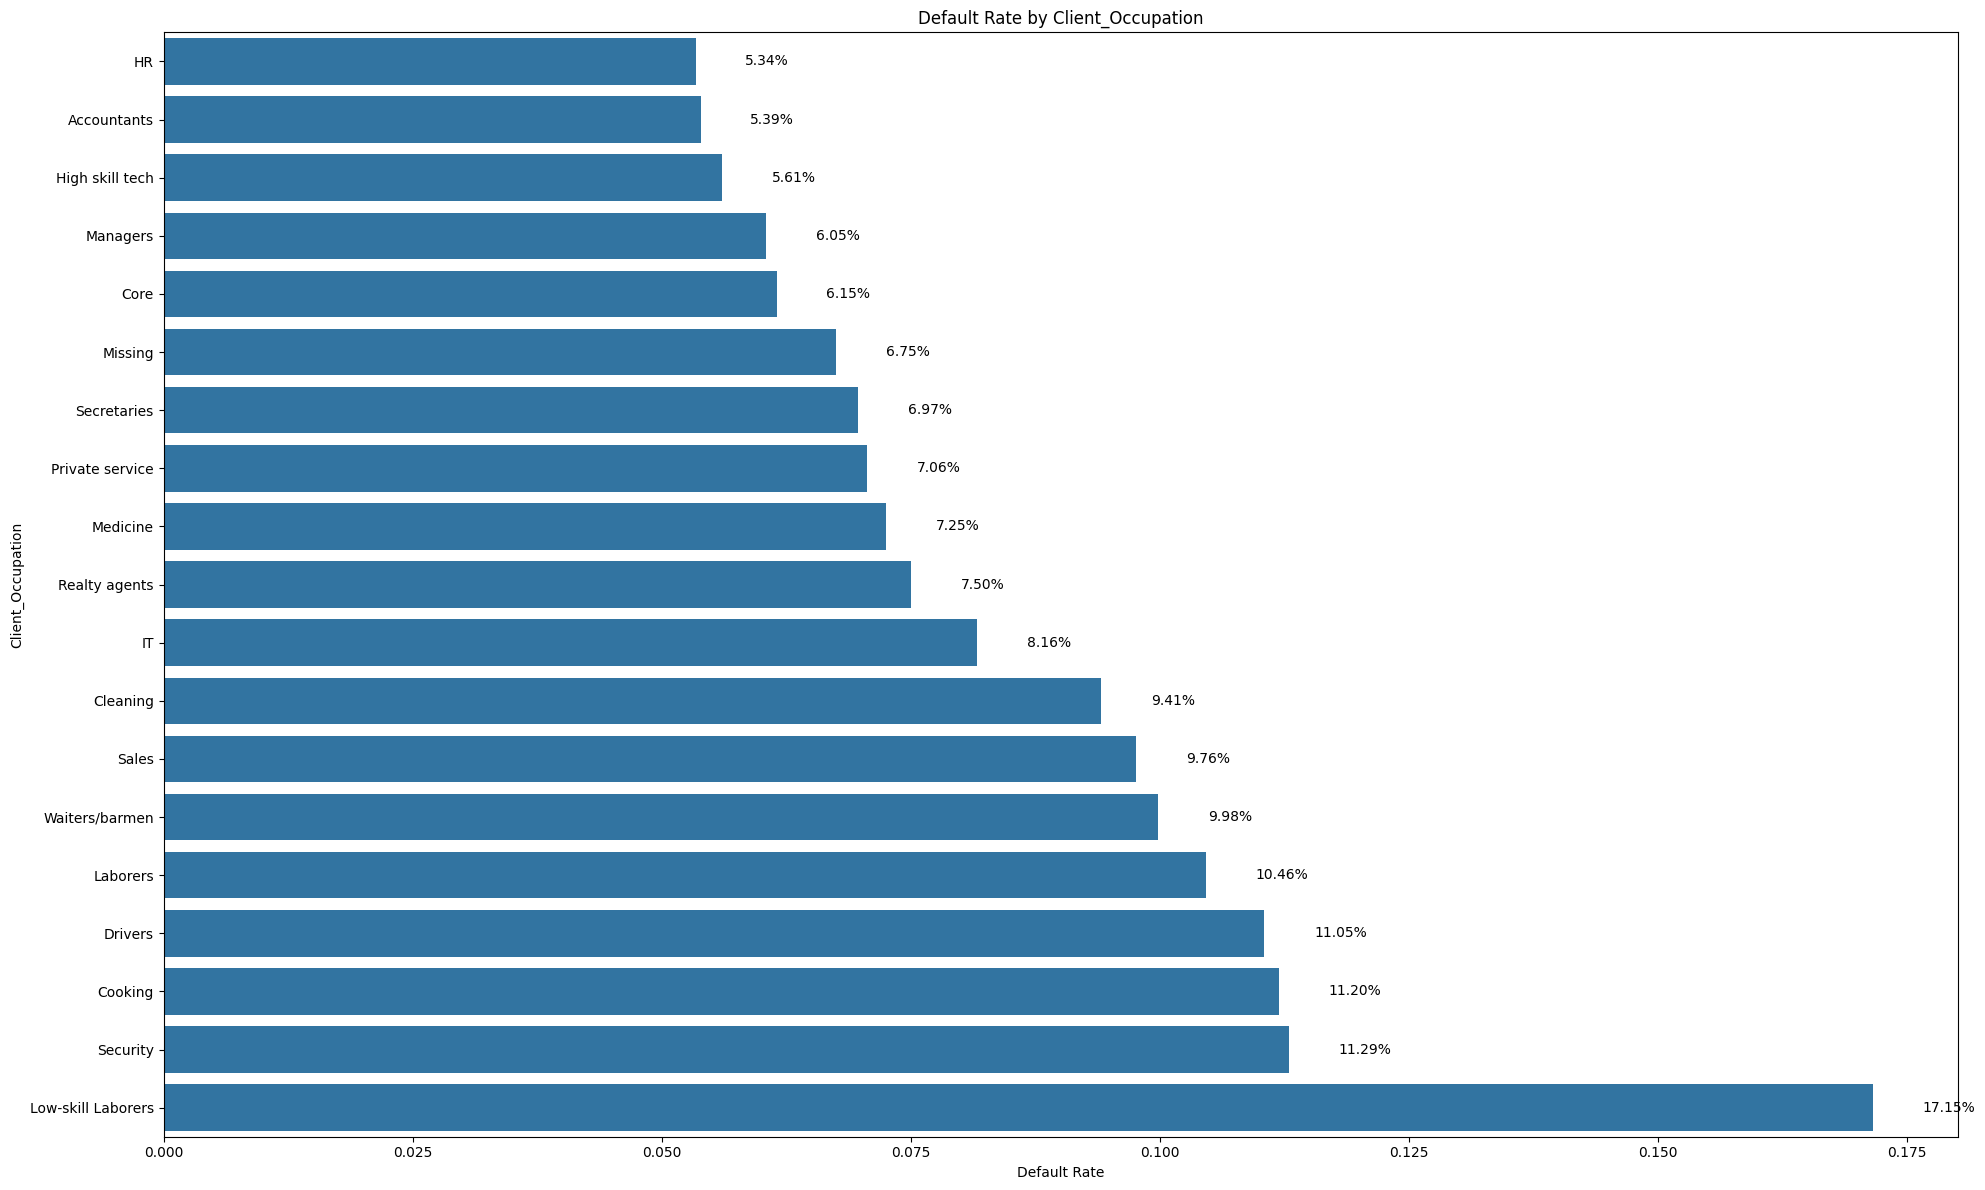

In [62]:
plot_col_vs_default_rate('Client_Occupation')

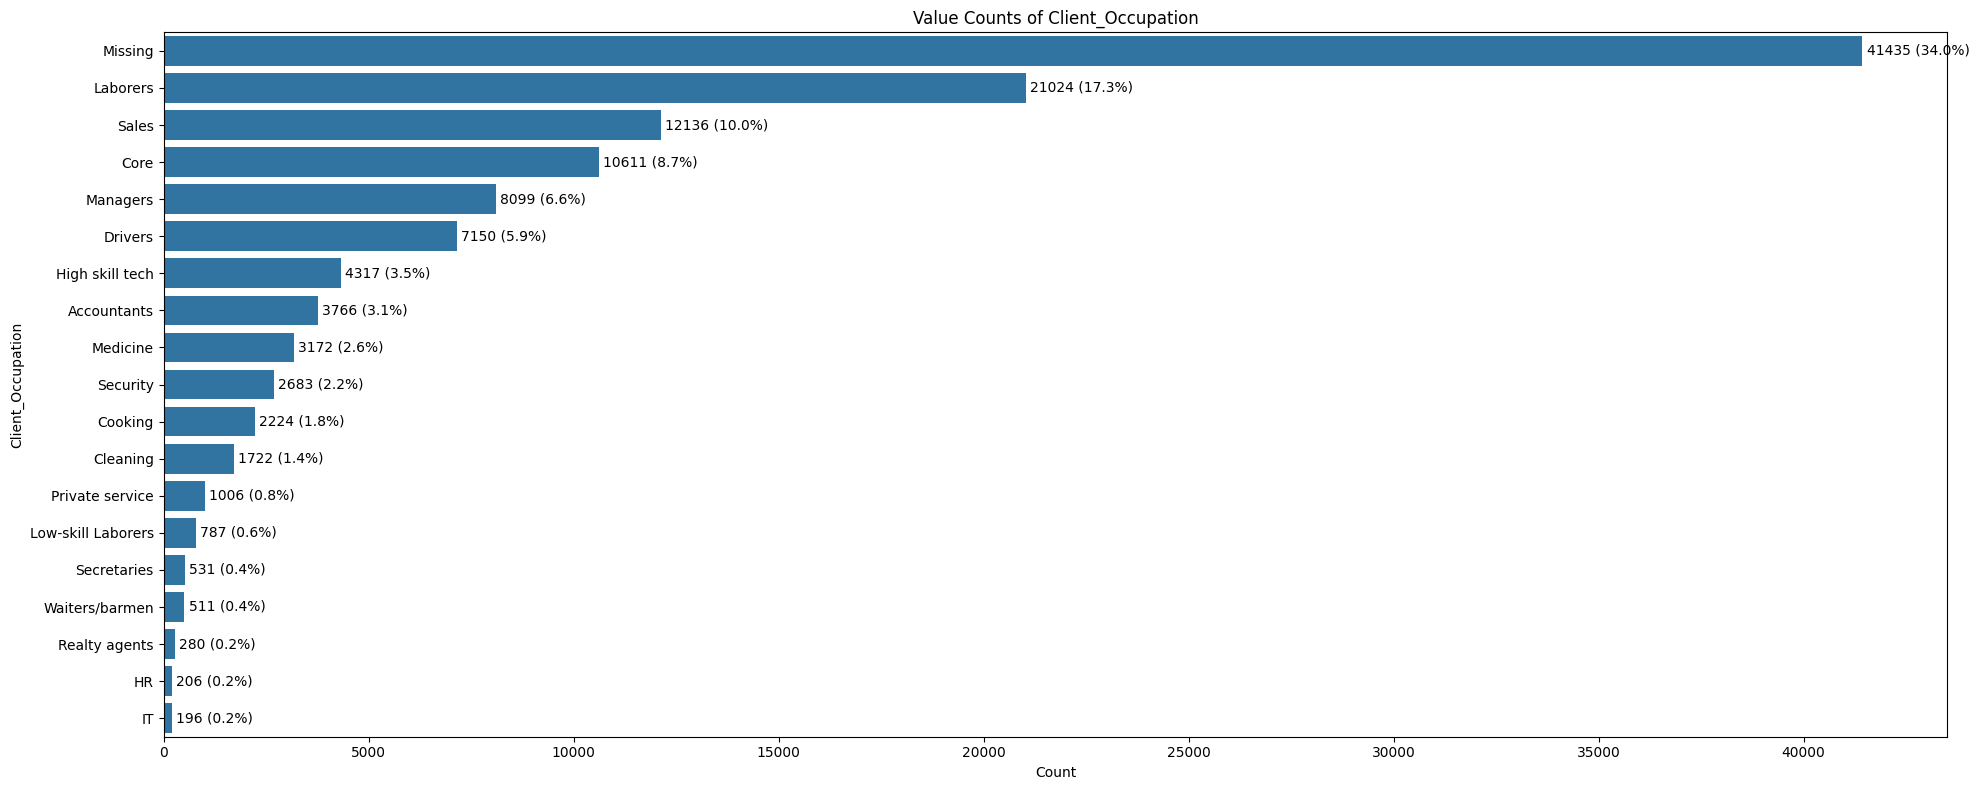

In [63]:
plot_values_count('Client_Occupation')

In [64]:
user_data['Client_Occupation'].value_counts(normalize=False)

Client_Occupation
Missing               41435
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64

In [65]:
user_data.groupby('Client_Occupation')['Default'].mean().sort_values(ascending=True)

Client_Occupation
HR                   0.05
Accountants          0.05
High skill tech      0.06
Managers             0.06
Core                 0.06
Missing              0.07
Secretaries          0.07
Private service      0.07
Medicine             0.07
Realty agents        0.07
IT                   0.08
Cleaning             0.09
Sales                0.10
Waiters/barmen       0.10
Laborers             0.10
Drivers              0.11
Cooking              0.11
Security             0.11
Low-skill Laborers   0.17
Name: Default, dtype: float64

In [66]:
def map_occupation_risk(occupation):
    low_risk = ['HR', 'Accountants', 'High skill tech', 'Managers', 'Core']
    medium_risk = ['Missing', 'Secretaries', 'Private service', 'Medicine', 'Realty agents',
                   'Laborers', 'IT', 'Cleaning', 'Sales', 'Waiters/barmen']
    high_risk = ['Drivers', 'Cooking', 'Security', 'Low-skill Laborers']
    
    if occupation in low_risk:
        return 'Low_Risk'
    elif occupation in medium_risk:
        return 'Medium_Risk'
    elif occupation in high_risk:
        return 'High_Risk'
    else:
        return 'Other'

user_data['Occupation_Risk_Level'] = user_data['Client_Occupation'].apply(map_occupation_risk)
user_data.drop(columns='Client_Occupation',inplace=True)


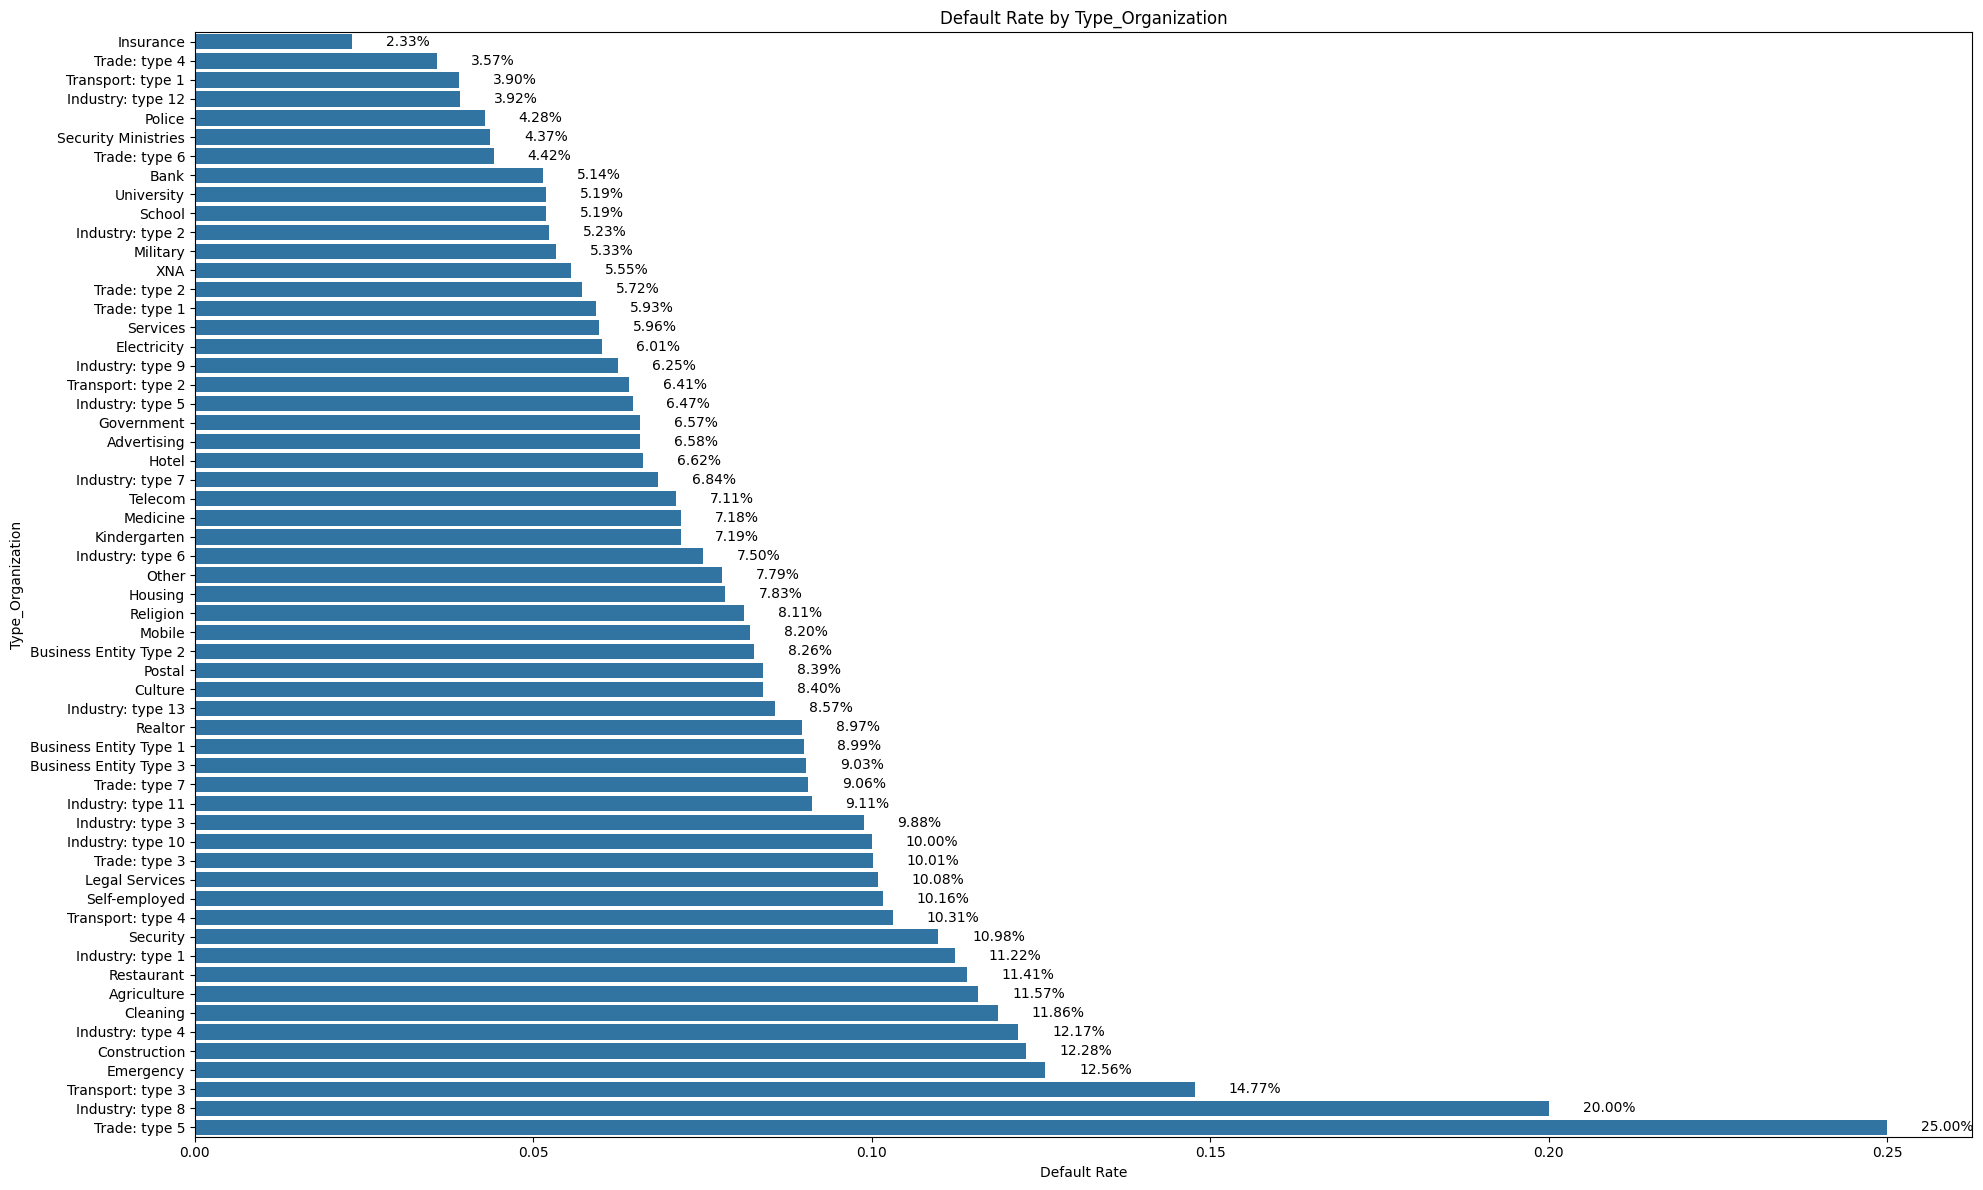

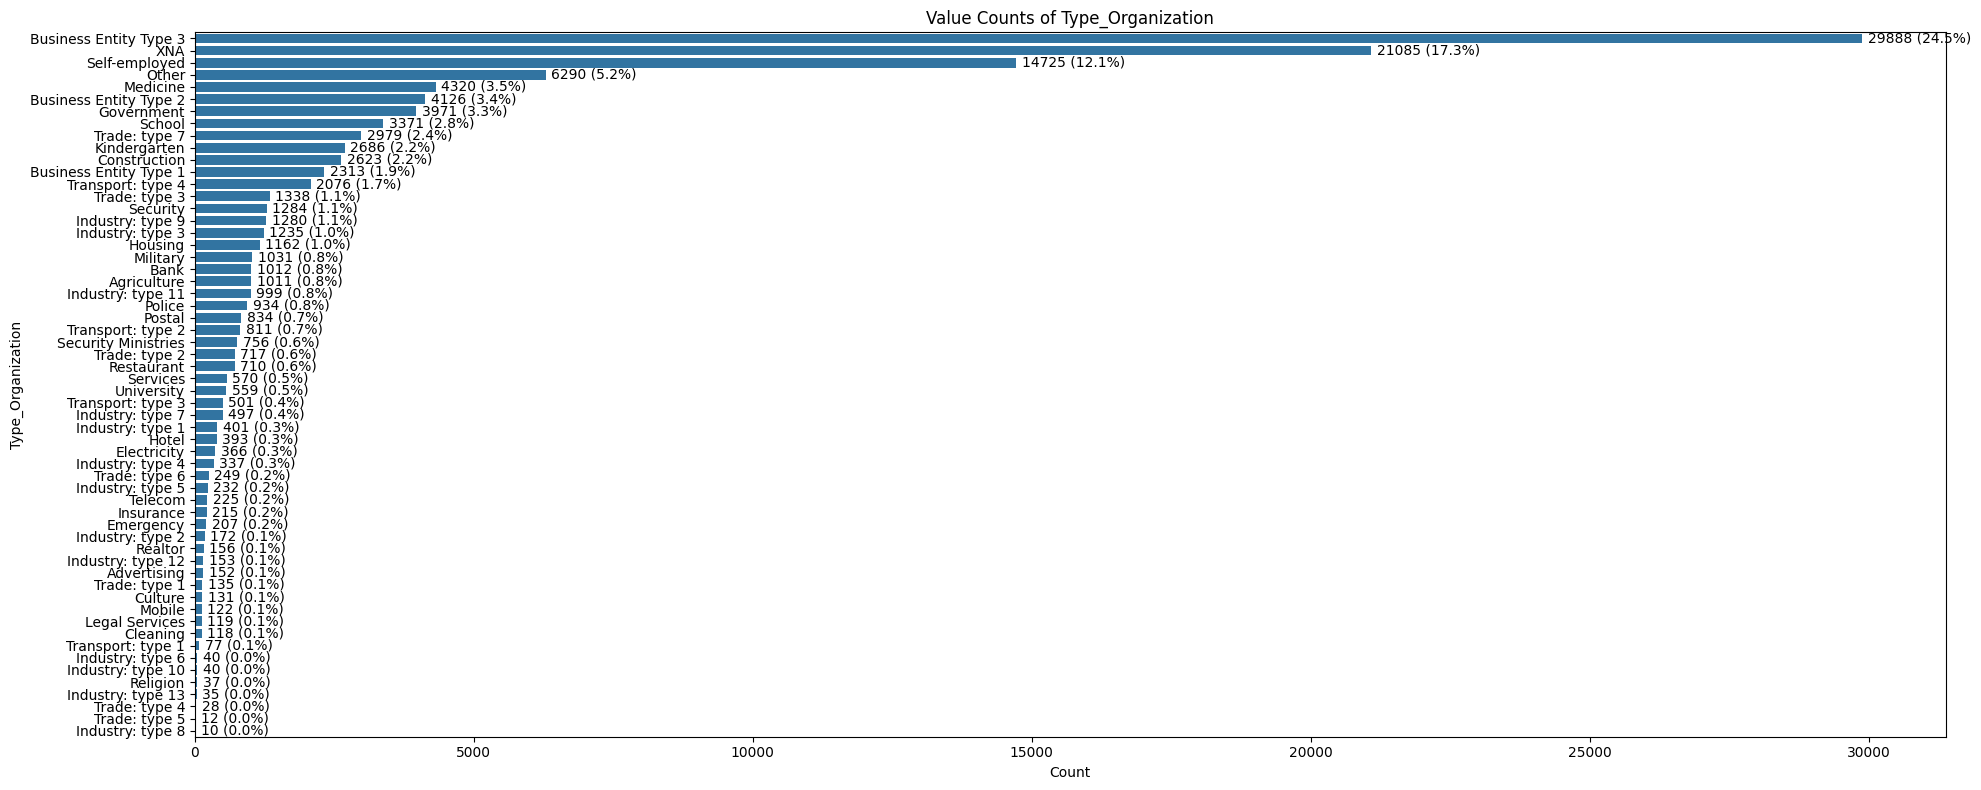

,Type_Organization,Default
0,Insurance,0.02
1,Trade: type 4,0.04
2,Transport: type 1,0.04
3,Industry: type 12,0.04
4,Police,0.04
5,Security Ministries,0.04
6,Trade: type 6,0.04
7,Bank,0.05
8,University,0.05
9,School,0.05


In [67]:


col = 'Type_Organization'
plot_col_vs_default_rate(col)
plot_values_count(col)
user_data.groupby(col)['Default'].mean().sort_values(ascending=True).reset_index()

In [68]:
def bin_type_organization(org):
    very_low = ['Insurance', 'Trade: type 4', 'Transport: type 1', 'Industry: type 12', 'Police', 'Security Ministries']
    low = ['Bank', 'University', 'School', 'Industry: type 2', 'Military', 'XNA', 'Trade: type 2', 'Trade: type 1',
           'Services', 'Electricity', 'Industry: type 9', 'Transport: type 2', 'Industry: type 5']
    medium = ['Government', 'Advertising', 'Hotel', 'Industry: type 7', 'Telecom', 'Medicine', 'Kindergarten',
              'Industry: type 6', 'Other', 'Housing', 'Religion', 'Mobile', 'Business Entity Type 2', 'Postal', 'Culture']
    high = ['Industry: type 13', 'Realtor', 'Business Entity Type 1', 'Business Entity Type 3', 'Trade: type 7',
            'Industry: type 11', 'Industry: type 3', 'Industry: type 10', 'Trade: type 3', 'Legal Services',
            'Self-employed', 'Transport: type 4']
    very_high = ['Security', 'Industry: type 1', 'Restaurant', 'Agriculture', 'Cleaning', 'Industry: type 4',
                 'Construction', 'Emergency', 'Transport: type 3', 'Industry: type 8', 'Trade: type 5']

    if org in very_low:
        return 'Very_Low_Risk'
    elif org in low:
        return 'Low_Risk'
    elif org in medium:
        return 'Medium_Risk'
    elif org in high:
        return 'High_Risk'
    elif org in very_high:
        return 'Very_High_Risk'
    else:
        return 'Unknown'

user_data['Org_Type_Binned'] = user_data['Type_Organization'].apply(bin_type_organization)
user_data.drop(columns='Type_Organization',inplace=True)


In [69]:
print(user_data['Org_Type_Binned'].value_counts(dropna=False))

Org_Type_Binned
High_Risk         55903
Low_Risk          31341
Medium_Risk       24986
Very_High_Risk     7214
Very_Low_Risk      2163
Unknown             249
Name: count, dtype: int64


In [70]:
user_data['Org_Type_Binned'].describe()

count        121856
unique            6
top       High_Risk
freq          55903
Name: Org_Type_Binned, dtype: object

In [71]:
# Encoding Method	Should we Use It?	Why?
# already we have defined order of risk -> label encoding should be used

In [72]:
user_data['Client_Permanent_Match_Tag'].value_counts()
# one hot encoding


Client_Permanent_Match_Tag
Yes    112454
No       9402
Name: count, dtype: int64

In [73]:
user_data['Client_Contact_Work_Tag'].value_counts()
# one hot encoding

Client_Contact_Work_Tag
Yes    100015
No      21841
Name: count, dtype: int64

In [74]:
user_data.select_dtypes(include="object")

,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Occupation_Risk_Level,Org_Type_Binned
0,Commercial,Secondary,M,Male,CL,Home,Yes,Yes,Medium_Risk,High_Risk
1,Service,Graduation,M,Male,CL,Home,Yes,Yes,Medium_Risk,Medium_Risk
2,Service,Graduation dropout,W,Male,CL,Family,Yes,Yes,Medium_Risk,High_Risk
3,Retired,Secondary,M,Male,CL,Home,Yes,Yes,Medium_Risk,Low_Risk
4,Commercial,Secondary,M,Female,CL,Home,Yes,Yes,Medium_Risk,High_Risk
...,...,...,...,...,...,...,...,...,...,...
121851,Service,Secondary,M,Female,CL,Home,Yes,No,Medium_Risk,Medium_Risk
121852,Commercial,Graduation,M,Female,CL,Home,Yes,Yes,Medium_Risk,High_Risk
121853,Govt Job,Secondary,M,Male,CL,Home,No,No,Low_Risk,Unknown
121854,Service,Graduation,M,Female,CL,Home,Yes,Yes,Medium_Risk,High_Risk


In [75]:
# Label encoding:
# - Occupation_Risk_Level
# - Org_Type_Binned

# One hot encoding:
# # - rest all categorical col


In [76]:
user_data['Occupation_Risk_Level'].value_counts(dropna=False)

Occupation_Risk_Level
Medium_Risk    82013
Low_Risk       26999
High_Risk      12844
Name: count, dtype: int64

In [77]:
user_data['Org_Type_Binned'].value_counts(dropna=False)

Org_Type_Binned
High_Risk         55903
Low_Risk          31341
Medium_Risk       24986
Very_High_Risk     7214
Very_Low_Risk      2163
Unknown             249
Name: count, dtype: int64

In [78]:
risk_mapping = {
    'Very_Low_Risk': 0,
    'Low_Risk': 1,
    'Medium_Risk': 2,
    'High_Risk': 3,
    'Very_High_Risk': 4,
    'Unknown': -1  # optional, in case of unknowns
}

user_data['Occupation_Risk_Level'] = user_data['Occupation_Risk_Level'].map(risk_mapping)



In [79]:
user_data['Org_Type_Binned'] = user_data['Org_Type_Binned'].map(risk_mapping)


In [80]:
user_data['Occupation_Risk_Level'].value_counts(dropna=False)

Occupation_Risk_Level
2    82013
1    26999
3    12844
Name: count, dtype: int64

In [81]:
user_data['Org_Type_Binned'].value_counts(dropna=False)

Org_Type_Binned
 3    55903
 1    31341
 2    24986
 4     7214
 0     2163
-1      249
Name: count, dtype: int64

In [82]:
user_data.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client                int64
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_

In [83]:
list(user_data.select_dtypes(object).columns)

['Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Client_Housing_Type',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag']

In [84]:
# !pip install scikit-learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [85]:
categorical_cols = list(user_data.select_dtypes(object).columns)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keeps all other columns (like numerical ones)
)
transformed_data = preprocessor.fit_transform(user_data)
# Get new encoded column names
encoded_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get non-transformed columns
non_cat_cols = [col for col in user_data.columns if col not in categorical_cols]

# Combine all column names
all_col_names = list(encoded_col_names) + non_cat_cols

# Convert to DataFrame
user_data_encoded = pd.DataFrame(transformed_data, columns=all_col_names)

user_data_encoded

,Client_Income_Type_Govt Job,Client_Income_Type_Others,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Unemployed,Client_Education_Graduation dropout,Client_Education_Junior secondary,Client_Education_Post Grad,Client_Education_Secondary,Client_Marital_Status_M,Client_Marital_Status_S,Client_Marital_Status_W,Client_Gender_Male,Loan_Contract_Type_RL,Client_Housing_Type_Home,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default,Occupation_Risk_Level,Org_Type_Binned
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12142509.00,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,0.00,0.03,13957.00,1062.00,6123.00,383.00,1.00,0.00,0.00,2.00,2.00,6.00,17.00,0.48,0.55,63.00,1.00,0.00,2.00,3.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12138936.00,20250.00,1.00,0.00,1.00,1.00,0.00,15282.00,1826.55,0.00,0.01,14162.00,4129.00,7833.00,21.00,1.00,0.00,1.00,2.00,2.00,3.00,10.00,0.22,0.55,755.00,1.00,0.00,2.00,2.00
2,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12181264.00,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,0.00,0.02,16790.00,5102.00,4493.00,331.00,1.00,0.00,0.00,2.00,2.00,4.00,12.00,0.55,0.33,277.00,0.00,0.00,2.00,3.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12188929.00,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,0.00,0.01,23195.00,12019.50,4493.00,775.00,1.00,0.00,0.00,2.00,2.00,2.00,15.00,0.14,0.63,1700.00,3.00,0.00,2.00,1.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12133385.00,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,0.00,0.02,11366.00,2977.00,5516.00,4043.00,1.00,0.00,0.00,4.00,2.00,3.00,12.00,0.30,0.36,674.00,1.00,0.00,2.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,12207714.00,29250.00,0.00,0.00,0.00,1.00,0.00,107820.00,3165.30,1.00,0.03,12889.00,2863.00,2661.00,2943.00,1.00,0.00,0.00,2.00,2.00,4.00,16.00,0.17,0.18,0.00,1.00,1.00,2.00,2.00
121852,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12173765.00,15750.00,0.00,1.00,1.00,0.00,0.00,104256.00,3388.05,0.00,0.02,8648.00,636.00,902.00,1209.00,1.00,0.00,0.00,2.00,2.00,4.00,12.00,0.37,0.41,4.00,0.00,0.00,2.00,3.00
121853,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,12103937.00,8100.00,0.00,1.00,0.00,1.00,1.00,55107.90,2989.35,0.00,0.01,9152.00,1623.00,3980.00,353.00,1.00,0.00,0.00,3.00,2.00,5.00,11.00,0.05,0.55,0.00,1.00,0.00,1.00,-1.00
121854,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12170623.00,33750.00,1.00,1.00,0.00,1.00,0.00,45000.00,2719.35,0.00,0.03,10290.00,847.00,895.00,2902.00,1.00,0.00,0.00,2.00,2.00,1.00,12.00,0.10,0.08,0.00,2.00,0.00,2.00,3.00


In [86]:
list(user_data_encoded.columns)

['Client_Income_Type_Govt Job',
 'Client_Income_Type_Others',
 'Client_Income_Type_Retired',
 'Client_Income_Type_Service',
 'Client_Income_Type_Unemployed',
 'Client_Education_Graduation dropout',
 'Client_Education_Junior secondary',
 'Client_Education_Post Grad',
 'Client_Education_Secondary',
 'Client_Marital_Status_M',
 'Client_Marital_Status_S',
 'Client_Marital_Status_W',
 'Client_Gender_Male',
 'Loan_Contract_Type_RL',
 'Client_Housing_Type_Home',
 'Client_Housing_Type_Municipal',
 'Client_Housing_Type_Office',
 'Client_Housing_Type_Rental',
 'Client_Housing_Type_Shared',
 'Client_Permanent_Match_Tag_Yes',
 'Client_Contact_Work_Tag_Yes',
 'ID',
 'Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Accompany_Client',
 'Population_Region_Relative',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Mobile_Tag',
 'Homephone_Tag',
 'Workphone_Working',
 'Client_Family_Members',
 'Cleint_City

In [87]:
user_data_encoded.isna().sum()

Client_Income_Type_Govt Job            0
Client_Income_Type_Others              0
Client_Income_Type_Retired             0
Client_Income_Type_Service             0
Client_Income_Type_Unemployed          0
Client_Education_Graduation dropout    0
Client_Education_Junior secondary      0
Client_Education_Post Grad             0
Client_Education_Secondary             0
Client_Marital_Status_M                0
Client_Marital_Status_S                0
Client_Marital_Status_W                0
Client_Gender_Male                     0
Loan_Contract_Type_RL                  0
Client_Housing_Type_Home               0
Client_Housing_Type_Municipal          0
Client_Housing_Type_Office             0
Client_Housing_Type_Rental             0
Client_Housing_Type_Shared             0
Client_Permanent_Match_Tag_Yes         0
Client_Contact_Work_Tag_Yes            0
ID                                     0
Client_Income                          0
Car_Owned                              0
Bike_Owned      

In [88]:
# Data cleaning/transformation process is now done.
# - Adjust data types as per data
# - Impute missing values
# - Clip outliers
# - convert categorical to numeric - label encoding & One hot encoding

In [89]:
user_data_encoded

,Client_Income_Type_Govt Job,Client_Income_Type_Others,Client_Income_Type_Retired,Client_Income_Type_Service,Client_Income_Type_Unemployed,Client_Education_Graduation dropout,Client_Education_Junior secondary,Client_Education_Post Grad,Client_Education_Secondary,Client_Marital_Status_M,Client_Marital_Status_S,Client_Marital_Status_W,Client_Gender_Male,Loan_Contract_Type_RL,Client_Housing_Type_Home,Client_Housing_Type_Municipal,Client_Housing_Type_Office,Client_Housing_Type_Rental,Client_Housing_Type_Shared,Client_Permanent_Match_Tag_Yes,Client_Contact_Work_Tag_Yes,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_2,Score_Source_3,Phone_Change,Credit_Bureau,Default,Occupation_Risk_Level,Org_Type_Binned
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12142509.00,6750.00,0.00,0.00,1.00,0.00,0.00,61190.55,3416.85,0.00,0.03,13957.00,1062.00,6123.00,383.00,1.00,0.00,0.00,2.00,2.00,6.00,17.00,0.48,0.55,63.00,1.00,0.00,2.00,3.00
1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12138936.00,20250.00,1.00,0.00,1.00,1.00,0.00,15282.00,1826.55,0.00,0.01,14162.00,4129.00,7833.00,21.00,1.00,0.00,1.00,2.00,2.00,3.00,10.00,0.22,0.55,755.00,1.00,0.00,2.00,2.00
2,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,12181264.00,18000.00,0.00,0.00,1.00,0.00,1.00,59527.35,2788.20,0.00,0.02,16790.00,5102.00,4493.00,331.00,1.00,0.00,0.00,2.00,2.00,4.00,12.00,0.55,0.33,277.00,0.00,0.00,2.00,3.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12188929.00,15750.00,0.00,0.00,1.00,1.00,0.00,53870.40,2295.45,0.00,0.01,23195.00,12019.50,4493.00,775.00,1.00,0.00,0.00,2.00,2.00,2.00,15.00,0.14,0.63,1700.00,3.00,0.00,2.00,1.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12133385.00,33750.00,1.00,0.00,1.00,0.00,2.00,133988.40,3547.35,0.00,0.02,11366.00,2977.00,5516.00,4043.00,1.00,0.00,0.00,4.00,2.00,3.00,12.00,0.30,0.36,674.00,1.00,0.00,2.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,12207714.00,29250.00,0.00,0.00,0.00,1.00,0.00,107820.00,3165.30,1.00,0.03,12889.00,2863.00,2661.00,2943.00,1.00,0.00,0.00,2.00,2.00,4.00,16.00,0.17,0.18,0.00,1.00,1.00,2.00,2.00
121852,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12173765.00,15750.00,0.00,1.00,1.00,0.00,0.00,104256.00,3388.05,0.00,0.02,8648.00,636.00,902.00,1209.00,1.00,0.00,0.00,2.00,2.00,4.00,12.00,0.37,0.41,4.00,0.00,0.00,2.00,3.00
121853,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,12103937.00,8100.00,0.00,1.00,0.00,1.00,1.00,55107.90,2989.35,0.00,0.01,9152.00,1623.00,3980.00,353.00,1.00,0.00,0.00,3.00,2.00,5.00,11.00,0.05,0.55,0.00,1.00,0.00,1.00,-1.00
121854,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,12170623.00,33750.00,1.00,1.00,0.00,1.00,0.00,45000.00,2719.35,0.00,0.03,10290.00,847.00,895.00,2902.00,1.00,0.00,0.00,2.00,2.00,1.00,12.00,0.10,0.08,0.00,2.00,0.00,2.00,3.00


In [90]:
user_data_encoded.to_csv("processed-data/loan-processed-data.csv", index=False)